# 1. Problem Framing

Poor mental health days is the target variable.

# 2. Data Exploration

This section is an initial exploration of the dataset which will inform the necessary steps to be taken in the following section.

Importing the libraries needed for this section.

In [145]:
import pandas as pd
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import itertools
import warnings
warnings.filterwarnings("ignore")

The data is then read from a .csv file into a pandas dataframe.

In [146]:
df_original = pd.read_csv('analytic_data2019.csv')
df_original.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [147]:
print('Number of rows: ', len(df_original))
print('Number of columns: ', len(df_original.columns))

Number of rows:  3195
Number of columns:  534


The cell below outputs a visualisation showing the extent to which data is missing. The black lines/dots represent filled in data, the white lines/dots represent nulls.

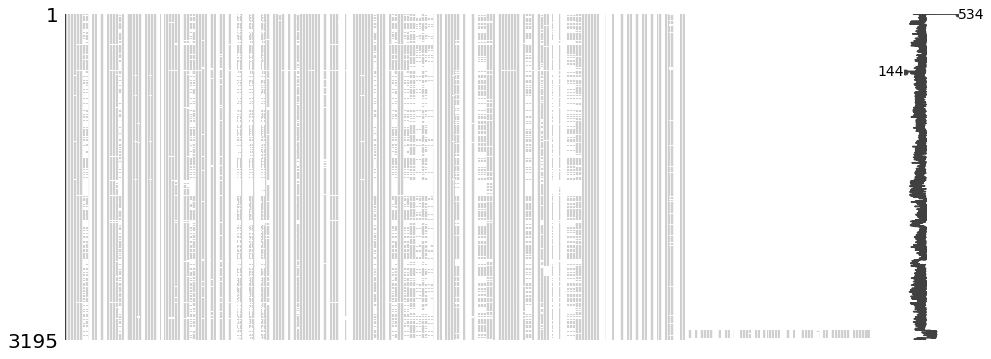

In [148]:
missingno.matrix(df_original, figsize=(16,6))
plt.show()

A quick check to see if our dependent variable has many missing values. Fortunately it is almost fully complete.

In [149]:
df_original['Poor mental health days raw value'].isnull().sum()

1

# 3. Data Wrangling

This section contains all of the data cleaning. The cleaning gets the data into a condition that is ready for modelling in later sections.

A copy of the original datframe is made in case we want to use the data in its original form at a later stage.

In [150]:
df_cleaning = df_original.copy()

It was noted that the first row of the dataframe was full of redundant secondary headings, therefore that row was removed.

In [151]:
df_cleaning.drop(df_cleaning.index[[0]], inplace=True)
df_cleaning.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

The dataset contains rows that respresent the entire state (all values are averaged). This can b seen in the dataframe preview above, where the first row is an average for the entire country, and the second row is an average for the whole of Alabama. The third row is then at the county level. To rid all of the summary rows, all of the County Ranked values that are null are filled in with 0s. They are then removed from the dataframe as we are only interested in data at a county level.

In [152]:
df_cleaning['County Ranked (Yes=1/No=0)'].fillna(0, inplace=True)

In [153]:
df_cleaning = df_cleaning[df_cleaning['County Ranked (Yes=1/No=0)'] != 0]

In [154]:
print('Number of rows: ', len(df_cleaning))

Number of rows:  3095


In the cell below, the columns that aren't needed are dropped.

In [155]:
df_cleaning.drop(columns=['State FIPS Code','County FIPS Code',
                          '5-digit FIPS Code','Release Year','County Ranked (Yes=1/No=0)'], inplace=True)
df_cleaning.head(2)

,State Abbreviation,Name,Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High school graduation CI low,High school graduation CI high,Some college raw value,Some college

In [156]:
columns = df_cleaning.columns
columns_included = list(filter(lambda column: column != 'State Abbreviation' and column != 'Name', columns))

for column in columns_included:
    df_cleaning[column] = df_cleaning[column].astype(float)

The entire dataframe, with exception of 'State Abbreviation' and 'Name', is converted into floats as they were initially stored as strings.

Many of the cells containing the terms given in 'search_terms' below were missing most of their values. These were dropped as they were not going to. be used in the analysis.

In [157]:
search_terms = ['White','white','Black','black','Hispanic','hispanic','CI','numerator','denominator']

columns_to_drop = []

for term in search_terms:
    
    df_cleaning_2 = df_cleaning.filter(regex=term)
    columns_to_drop.append(list(df_cleaning_2.columns))

columns_to_drop = list(itertools.chain(*columns_to_drop))
print('Number of columns to drop: ', len(columns_to_drop))

Number of columns to drop:  450


In [158]:
df_cleaning.drop(columns=columns_to_drop, inplace=True)

In [159]:
print('Number of columns in dataframe: ', len(df_cleaning.columns))

Number of columns in dataframe:  109


In the cell below, all columns that have more than 10% of their data missing are removed from the dataframe.

In [160]:
df_cleaning = df_cleaning.loc[:, df_cleaning.isnull().mean() < .1]
print('Number of columns left in dataframe: ', len(df_cleaning.columns))

Number of columns left in dataframe:  68


In [161]:
df_cleaning.reset_index(drop=True, inplace=True)

In [162]:
df_cleaning.head(5)

,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Children eligible for free or reduced price lunch raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,AL,Autauga County,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,0.479317,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
1,AL,Baldwin County,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,0.450791,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791
2,AL,Barbour County,9586.165037,0.257734,5.067438,4.634994,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,2596.500000,0.000356,2807.777778,0.000079,12635.000000,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,0.162162,0.146323,0.180,0.232,0.107397,0.385632,0.165422,0.029014,0.000237,4211.666667,32490.0,0.737698,0.625068,0.135868,25270.0,0.207638,0.188247,0.006529,0.004630,0.001860,0.011

A quick check to see how many null values remain in the dataframe.

In [163]:
df_cleaning.isnull().sum().sum()

1944

In the following few cells all null values are replaced with the median for the state in which the county exists. To do this, mathematical operations will take place on each column. The 'Name' column is dropped as it cannot be mathematically operated on due to its contents being strings.

In [164]:
county_names = df_cleaning["Name"]
df_cleaning.drop(columns=["Name"], inplace=True)

In [165]:
df_cleaning.head(2)

,State Abbreviation,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Children eligible for free or reduced price lunch raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,AL,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.16878,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,0.479317,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
1,AL,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.16715,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,0.450791,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791


In [166]:
df_cleaning.iloc[:,1:] = df_cleaning.groupby("State Abbreviation").transform(lambda x: x.fillna(x.median()))

A quick check to see how many null values still exist after filling in with means of the states.

In [167]:
df_cleaning.isnull().sum().sum()

152

These null values are due to data being missing for entire states, so they could not be filled in with a median for the state as no data existed at all. The cell below outputs the columns that still contain nulls.

In [168]:
columns = df_cleaning.columns
columns_with_nulls = []

for column in columns:
    if df_cleaning[column].isnull().sum() > 0:
        columns_with_nulls.append(column)

columns_with_nulls

['Air pollution - particulate matter raw value',
 'Drinking water violations raw value',
 'Children eligible for free or reduced price lunch raw value']

As none of these features appear to have much link to mental health, they are dropped from the dataframe.

In [169]:
df_cleaning.drop(columns=columns_with_nulls, inplace=True)

In [170]:
df_cleaning.insert(1, "County Name", county_names)

The poor mental health days columns is moved to the beginning of the dataframe as this is the target variable.

In [171]:
poor_mental_health = df_cleaning['Poor mental health days raw value']
df_cleaning.drop(columns=['Poor mental health days raw value'], inplace=True)
df_cleaning.insert(2, "Poor mental health days", poor_mental_health)

In [172]:
df_cleaning.head()

,State Abbreviation,County Name,Poor mental health days,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,AL,Autauga County,4.306739,8824.057123,0.184111,4.200578,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
1,AL,Baldwin County,4.249649,7224.632160,0.180605,4.098748,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791
2,AL,Barbour County,4.634994,9586.165037,0.257734,5.067438,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,2596.500000,0.000356,2807.777778,0.000079,12635.000000,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,0.162162,0.146323,0.180,0.232,0.107397,0.385632,0.165422,0.029014,0.000237,4211.666667,32490.0,0.625068,0.135868,25270.0,0.207638,0.188247,0.006529,0.004630,0.001860,0.011993,0.472299,0.677896
3,AL,Bibb County,4.315710,11783.543675,0.199969,4.363377,0.111050,0.199164,0.378,7.6,0.349,0.162514,0.159252,0.272727,302.1,45.454545,0.096801,0.000574,1741.769231,0.000265,377

In the following cells a correlation matrix is created. A copy of the df_cleaning dataframe is made in case we want to use it in it's current state later on.

In [173]:
df_cleaning_1 = df_cleaning.copy()

As we will be plotting a correelation matrix, the state and country names are once again dropped.

In [174]:
df_cleaning_1.drop(columns=["State Abbreviation","County Name"], inplace=True)

In [175]:
corr_mat_1 = df_cleaning_1.corr()

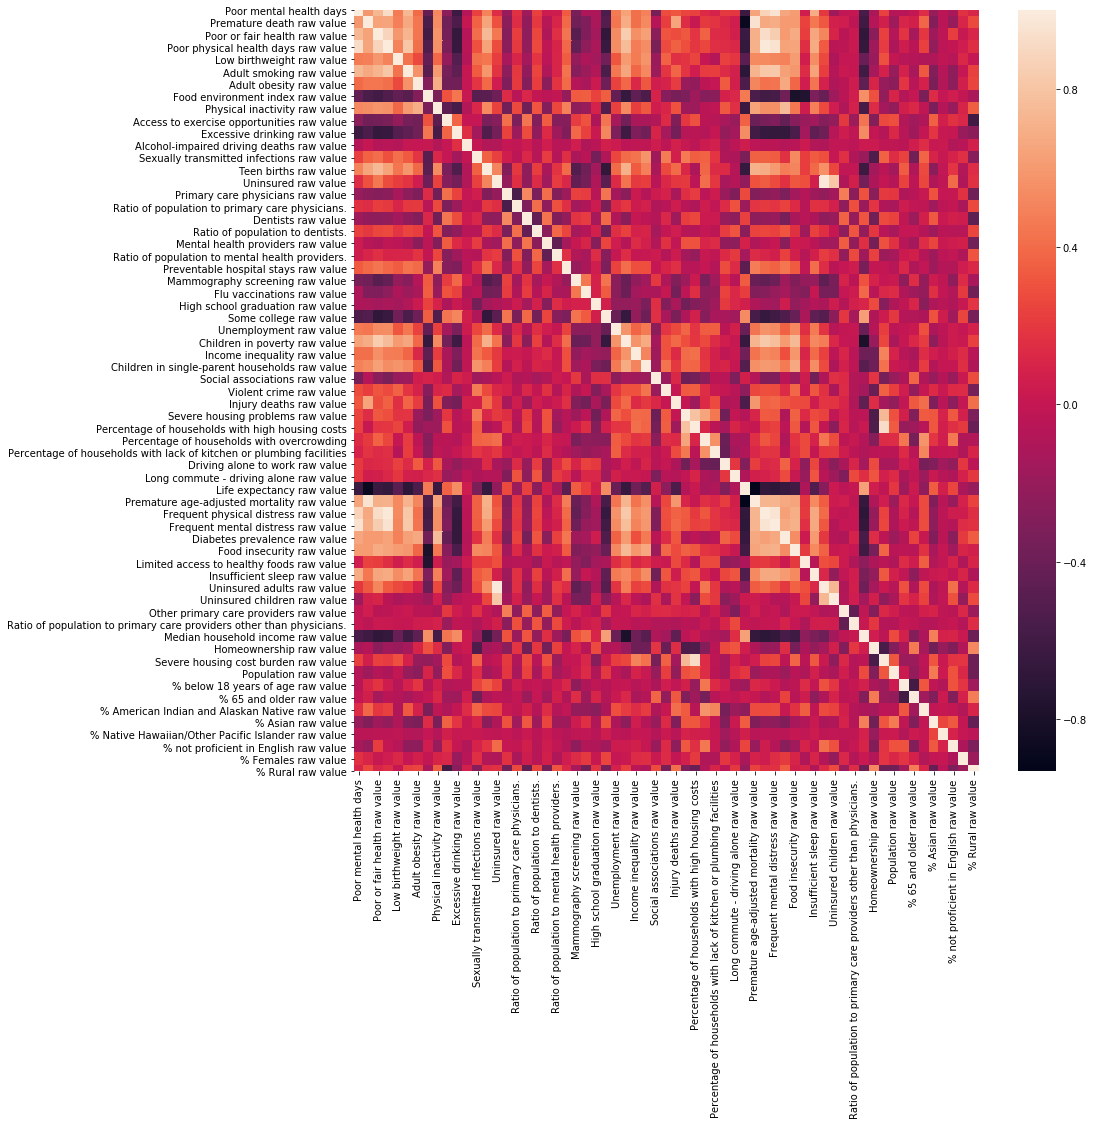

In [176]:
plt.figure(figsize=(14,14))

ax = sns.heatmap(corr_mat_1)

From the correlation matrix it is clear that life expectancy is strongly negatively correlated with many of the other values. This colinearity should be avoided. It is also likely that the dependant variable of this study, poor mental health, may be a causal factor in shorter life expectancy, not the other way around. For these reasons, this column is dropped from the study. Frequent mental distress and poor mental health days are proxies of each other and therefore the frequent mental distress variable was also dropped.

In [177]:
df_cleaning_1.drop(columns=["Life expectancy raw value",
                            "Frequent mental distress raw value",
                            "Frequent physical distress raw value",
                            "Poor or fair health raw value"],
                            inplace=True)

Another correlation matrix is made with the dataframe.

In [178]:
corr_mat_2 = df_cleaning_1.corr()

The absolute values of correlation with the target variable are then sorted, giving the top 5 variables that are most correlated with poor mental health days.

In [179]:
top_corr = corr_mat_2['Poor mental health days'].abs(
                        ).sort_values(ascending=False)[1:6]
top_corr

Poor physical health days raw value           0.918735
Adult smoking raw value                       0.739944
Insufficient sleep raw value                  0.684812
Diabetes prevalence raw value                 0.655727
Premature age-adjusted mortality raw value    0.648104
Name: Poor mental health days, dtype: float64

In [180]:
df_top_corr = pd.DataFrame(top_corr)
df_top_corr_features = df_top_corr.index
features = list(df_top_corr_features)

A new dataframe, df_modelling, is then created to be used in the modelling section of the project. This contains the five most correlated features, as well as the target variable, state and county names.

In [181]:
df_modelling = df_cleaning_1[features]
df_modelling.insert(0, "Poor mental health days", poor_mental_health)
df_modelling.insert(0, "State Abbreviation", df_cleaning['State Abbreviation'])
df_modelling.insert(0, "County Name", df_cleaning['County Name'])
df_modelling.head()

,County Name,State Abbreviation,Poor mental health days,Poor physical health days raw value,Adult smoking raw value,Insufficient sleep raw value,Diabetes prevalence raw value,Premature age-adjusted mortality raw value
0,Autauga County,AL,4.306739,4.200578,0.191247,0.359054,0.142,438.7
1,Baldwin County,AL,4.249649,4.098748,0.167955,0.333059,0.113,348.4
2,Barbour County,AL,4.634994,5.067438,0.215409,0.385632,0.180,469.8
3,Bibb County,AL,4.315710,4.363377,0.199164,0.381489,0.149,563.7
4,Blount County,AL,4.701599,4.512753,0.196522,0.359450,0.143,501.8


# 4. Modelling - First Iteration (1/2)

This section outlines all of the modelling completed for this analysis. It begins with plotting of correlated features to get a visual representation of this. Then it moves on to model creation, and lastly model testing.

## 4.1. Plotting Highly Correlated Variables

Plotting the three strongest correlated variables to get a visual representation of their relationship with poor mental health.

Description of each variable:

 - Poor physical health days raw value: this is the days per month which the average person feels physically unwell. For the plot below, this variable was divided by the number of days in a month. This was so that it was represented as a percentage like the other two variables in the plot.
 
 - Adult smoking raw value: the percentage of adults that reported currently smoking.
 - Insufficient sleep raw value: the percentage of people that reported they were currently getting insufficient sleep.

In [182]:
df_modelling_1 = df_modelling.copy()

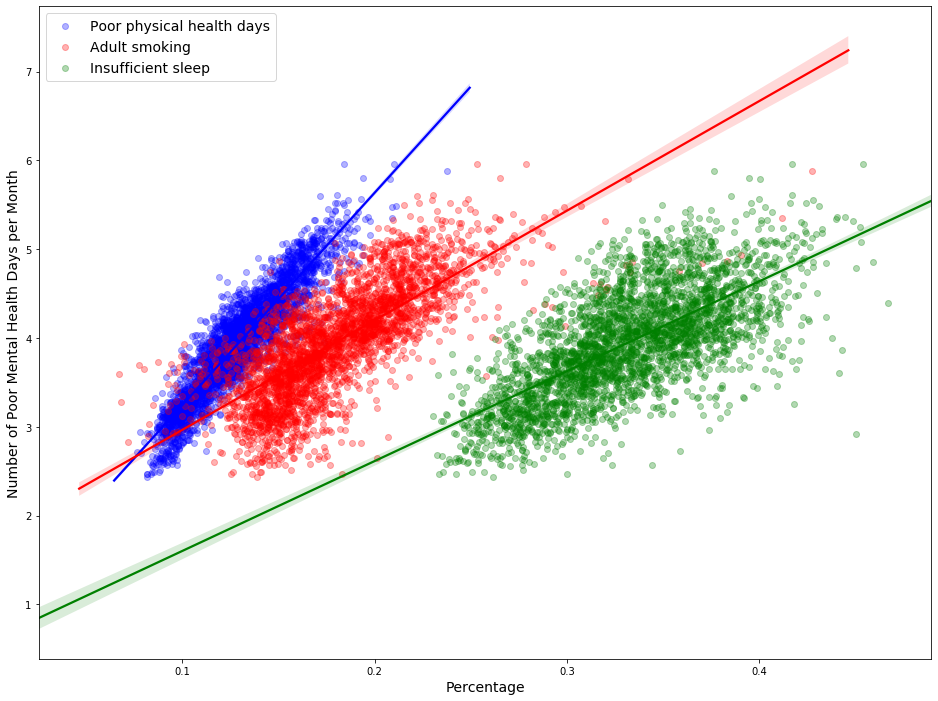

In [183]:
fig, ax = plt.subplots(figsize=(16,12))

sns.regplot(df_modelling_1['Poor physical health days raw value']/(365/12), 
            y='Poor mental health days',
            data=df_modelling_1,
            color='blue',
            scatter_kws={'alpha':0.3},
            label='Poor physical health days',
            ax=ax)
sns.regplot(x='Adult smoking raw value', 
            y='Poor mental health days',
            data=df_modelling_1,
            color='red',
            scatter_kws={'alpha':0.3},
            label='Adult smoking',
            ax=ax)
sns.regplot(x='Insufficient sleep raw value', 
            y='Poor mental health days',
            data=df_modelling_1,
            color='green',
            scatter_kws={'alpha':0.3},
            label='Insufficient sleep',
            ax=ax)
plt.legend(fontsize=14)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Number of Poor Mental Health Days per Month', fontsize=14)
plt.show()

## 4.2. Train-Test Split

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

The columns that werent going to be used in the analysis were removed from the dataset.

In [185]:
df_modelling_1.drop(columns=['State Abbreviation','County Name'], inplace=True)

The target variable, y, was set to equal the poor mental health column. The features, X, were set to equal everything but the target variable column.

In [186]:
y = df_modelling_1['Poor mental health days']
X = df_modelling_1.drop(columns=['Poor mental health days'])

The data was then split into training and test groups. It was ensured that there would be at least 1000 data points in the test data as this is a common industry standard minimum, ensuring a fair test of the model.

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1000)

In [188]:
len(X_train)

2095

In the validation of each model, a KFold split will be used to. split the training data into 5 groups of training and test combinations. This allows for a more robust assessment of the models performance, as opposed to just gauging performance based on the training data as a whole.

In [189]:
kf = KFold(n_splits=5)

## 4.3. Model Creation

This section outlines the creation of each model. Multiple models were made, starting from more simple variations, and then moving on to more complex ones. An assessment is made on each one, and only one is chosen to be taken forward for testing on the test data.

### 4.3.1 Linear Regression (Baseline Model)

Linear regression will serve as the baseline model for this analysis. All models made after this will be compared to this one to determine whether or not the increased performance is worth the additional complexity.

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [191]:
# Creating empty lists
base_train_r_squared_list = []
base_test_r_squared_list = []
base_num_features = []

# Initiating the sklearn linear regression class
baseline = LinearRegression()

# The model is run through a KFold cross validation
model_scores = cross_validate(baseline,
                              X_train,
                              y_train,
                              scoring=('r2', 'neg_mean_squared_error'),
                              cv=kf,
                              return_train_score=True)

# The mean r^2 for the train and test data is appended to the lists
base_train_r_squared_list.append(model_scores['train_r2'].mean())
base_test_r_squared_list.append(model_scores['test_r2'].mean())

# The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
# outside of the cross_validate as the function does not store the  coefficients.
baseline.fit(X_train, y_train)
base_num_features.append(len(baseline.coef_))

# The lists are then used to create a dataframe containing all of the results for the model
df_base = pd.DataFrame()
df_base['Train r^2'] = base_train_r_squared_list
df_base['Validation r^2'] = base_test_r_squared_list
df_base['Difference'] = df_base['Train r^2'] - df_base['Validation r^2']
df_base['Number of Features'] = base_num_features
df_base

,Train r^2,Validation r^2,Difference,Number of Features
0,0.856101,0.85408,0.00202,5


### 4.3.2. Polynomial Regression

Polynomial regression is built upon linear regression, however it now accounts for the non-linear relationship between variables.

In [192]:
from sklearn.preprocessing import PolynomialFeatures

In [193]:
# Creating empty lists
degree_list = []
poly_train_r_squared_list = []
poly_test_r_squared_list = []
poly_num_features = []

# Creating a for loop to run through the increasing degrees of polynomial 
for degree in np.arange(1,4):
    
    # Transforming the training data to the polynomial degree
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    
    # Initiating the sklearn linear regression class
    poly_reg = LinearRegression()
    
    # The model is run through a KFold cross validation
    model_score = cross_validate(poly_reg,
                                 X_train_poly,
                                 y_train,
                                 scoring=('r2', 'neg_mean_squared_error'),
                                 cv=kf,
                                 return_train_score=True)
    
    # The polynomial degree,and the mean r^2 for the train and test data are appended to the lists
    degree_list.append(degree)
    poly_train_r_squared_list.append(model_score['train_r2'].mean())
    poly_test_r_squared_list.append(model_score['test_r2'].mean())
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    poly_reg.fit(X_train_poly, y_train)
    poly_num_features.append(len(poly_reg.coef_))

# The lists are then used to create a dataframe containing all of the results for the model
df_poly = pd.DataFrame()
df_poly['Polynomial Degree'] = degree_list
df_poly['Train r^2'] = poly_train_r_squared_list
df_poly['Validation r^2'] = poly_test_r_squared_list
df_poly['Difference'] = df_poly['Train r^2'] - df_poly['Validation r^2']
df_poly['Number of Features'] = poly_num_features
df_poly

,Polynomial Degree,Train r^2,Validation r^2,Difference,Number of Features
0,1,0.856101,0.854080,0.002020,6
1,2,0.872166,0.866537,0.005628,21
2,3,0.884251,0.867922,0.016329,56


All models performed well, but there wasn't a significant increase in performance from the baseline model. The polynomial to the 3rd degree was the best performer on the training and test data. Having said this, it also has the most disparity between the training and test scores, suggesting it is overfitting somewhat. This may be something that can be rectified with the later models. It should be noted that the rate of increase in coefficients with each increase in polynomial degree is very high. This should be avoided as it increases complexity greatly, making it harder to infer the results.

### 4.3.3 Lasso Regression

Lasso regression is simialr to polynomial regression, however it applies a pentaly function which is the sum of the absolute values of the coefficents. This reduces the weights of unimportant variables to zero, meaning it simplifies the model, leaving just the features of most importance.

In [194]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

The training data is transformed to the 3rd polynomial degree as this was the best performing polynomial model. Lasso regression may eliminate many of the 56 coefficients that the polynomial transformation created.

In [195]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

The data is then also scaled so that all data points are turned into a z-score (the number of standard deviations away from the mean). This is for several reasons:

 - The coefficients output at the end will be more interpretable as they can be ranked in order of importance.
 - The lasso penalty constrains the size of the coefficients, however this value is dependent on the magnitude of. the variable. Thereforefor fair penalisation, the variables must be standardised.

In [196]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_poly)

In [197]:
# Creating empty lists
alpha_list = []
lasso_train_r_squared_list = []
lasso_test_r_squared_list = []
lasso_num_features = []

# Creating a for loop to run through increasing alpha (penalty parameter)
for alpha in np.linspace(0.001, 0.01, 10):
    
    # Initiating the sklearn linear lasso class
    lasso = Lasso(alpha=alpha)

    # The model is run through a KFold cross validation
    model_scores = cross_validate(lasso,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2','neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    # The alpha,and the mean r^2 for the train and test data are appended to the lists
    alpha_list.append(alpha)
    lasso_train_r_squared_list.append(model_scores['train_r2'].mean())
    lasso_test_r_squared_list.append(model_scores['test_r2'].mean())
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    lasso.fit(X_train_s, y_train)
    lasso_coefficients = lasso.coef_
    lasso_coefficients  = lasso_coefficients[lasso_coefficients!=0]
    lasso_num_features.append(len(lasso_coefficients))

# The lists are then used to create a dataframe containing all of the results for the model
df_lasso = pd.DataFrame()
df_lasso['Alpha'] = alpha_list
df_lasso['Train r^2'] = lasso_train_r_squared_list
df_lasso['Validation r^2'] = lasso_test_r_squared_list
df_lasso['Difference'] = df_lasso['Train r^2'] - df_lasso['Validation r^2']
df_lasso['Number of Features'] = lasso_num_features
df_lasso

,Alpha,Train r^2,Validation r^2,Difference,Number of Features
0,0.001,0.865627,0.861304,0.004322,14
1,0.002,0.863010,0.859939,0.003070,10
2,0.003,0.860276,0.857522,0.002754,12
3,0.004,0.857016,0.854844,0.002172,8
4,0.005,0.856710,0.854527,0.002182,7
5,0.006,0.856436,0.854206,0.002230,7
6,0.007,0.856123,0.853845,0.002278,7
7,0.008,0.855760,0.853428,0.002333,7
8,0.009,0.855364,0.852970,0.002394,6
9,0.010,0.855004,0.852658,0.002346,6


Fromt the dataframe above it is clear that the number of coefficients decreases as the alpha increases. The best performing model however was the alpha of 0.001, after this the performance of the model on the training and validation data both decreased. The difference between the training and validation performance decreases with increasing alpha, showing that the lasso penalty is reducing any overfitting.

### 4.3.4. Ridge Regression

Ridge regression is very similar to polynomial regression, however the penalty parameter is now multiplied by the sum of coefficients squared. This mean that it never reduces unimportant feature coefficients to zero, but it will reduce them to near zero.

In [198]:
from sklearn.linear_model import Ridge

In [199]:
# Creating empty lists
alpha_list = []
ridge_train_r_squared_list = []
ridge_test_r_squared_list = []
ridge_num_features = []

# Creating a for loop to run through increasing alpha (penalty parameter)
for alpha in [0.0001,0.001,0.01,1,50,100,1000,10000]:
    
    # Initiating the sklearn linear lasso class
    ridge = Ridge(alpha=alpha)
    
    # The model is run through a KFold cross validation
    model_scores = cross_validate(ridge,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2','neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    # The alpha,and the mean r^2 for the train and test data are appended to the lists
    alpha_list.append(alpha)
    ridge_train_r_squared_list.append(model_scores['train_r2'].mean())
    ridge_test_r_squared_list.append(model_scores['test_r2'].mean())
    
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    ridge.fit(X_train_s, y_train)
    ridge_coefficients = ridge.coef_
    ridge_coefficients  = ridge_coefficients[ridge_coefficients!=0]
    ridge_num_features.append(len(ridge_coefficients))

# The lists are then used to create a dataframe containing all of the results for the model
df_ridge = pd.DataFrame()
df_ridge['Alpha'] = alpha_list
df_ridge['Train r^2'] = ridge_train_r_squared_list
df_ridge['Validation r^2'] = ridge_test_r_squared_list
df_ridge['Difference'] = df_ridge['Train r^2'] - df_ridge['Validation r^2']
df_ridge['Number of Features'] = ridge_num_features
df_ridge

,Alpha,Train r^2,Validation r^2,Difference,Number of Features
0,0.0001,0.884248,0.868386,0.015862,55
1,0.0010,0.884054,0.870657,0.013397,55
2,0.0100,0.882135,0.872234,0.009900,55
3,1.0000,0.873873,0.868160,0.005714,55
4,50.0000,0.859082,0.855762,0.003320,55
5,100.0000,0.853864,0.851032,0.002832,55
6,1000.0000,0.823321,0.820818,0.002503,55
7,10000.0000,0.731662,0.728896,0.002766,55


Similarly to the lasso model, increasing alpha resulted in less overfitting. It reduced the training performance but increased the validation performance until alpha = 0.01. After this both the training and. validation performance decreased. Its clear that the ridge regression did not remove any variables (it actually removed one however this is likely due to a rounding error where one of the coefficients is close enough to zero that python assumes it is okay to remove it).

### 4.3.5. ElasticNet Regression

ElasticNet regression is a form of regression that combines both the lasso and the ridge penalty functions.

In [200]:
from sklearn.linear_model import ElasticNet

In [201]:
# Creating empty lists
alpha_list = []
elastic_train_r_squared_list = []
elastic_test_r_squared_list = []
elastic_num_features = []

# Creating a for loop to run through increasing alpha (penalty parameter)
for alpha in np.linspace(0.001, 0.01, 10):
    
    # Initiating the sklearn linear lasso class
    elastic = ElasticNet(alpha=alpha)
    
    # The model is run through a KFold cross validation
    model_scores = cross_validate(elastic,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2', 'neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    # The alpha,and the mean r^2 for the train and test data are appended to the lists
    alpha_list.append(alpha)
    elastic_train_r_squared_list.append(model_scores['train_r2'].mean())
    elastic_test_r_squared_list.append(model_scores['test_r2'].mean())
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    elastic.fit(X_train_s, y_train)
    elastic_coefficients = elastic.coef_
    elastic_coefficients  = elastic_coefficients[elastic_coefficients!=0]
    elastic_num_features.append(len(elastic_coefficients))

# The lists are then used to create a dataframe containing all of the results for the model
df_elastic = pd.DataFrame()
df_elastic['Alpha'] = alpha_list
df_elastic['Train r^2'] = elastic_train_r_squared_list
df_elastic['Validation r^2'] = elastic_test_r_squared_list
df_elastic['Difference'] = df_elastic['Train r^2'] - df_elastic['Validation r^2']
df_elastic['Number of Features'] = elastic_num_features
df_elastic

,Alpha,Train r^2,Validation r^2,Difference,Number of Features
0,0.001,0.867787,0.861993,0.005794,20
1,0.002,0.865136,0.861314,0.003822,13
2,0.003,0.863459,0.860493,0.002965,10
3,0.004,0.862262,0.859452,0.002809,10
4,0.005,0.860815,0.858200,0.002615,11
5,0.006,0.859052,0.856574,0.002477,11
6,0.007,0.857503,0.855193,0.002309,9
7,0.008,0.856691,0.854548,0.002143,8
8,0.009,0.856471,0.854351,0.002120,7
9,0.010,0.856289,0.854175,0.002114,7


The number of coefficients in the model is greater than that of lasso, but fewer than ridge. This is because as previously stated, it is a combination of lasso and ridge, reducing some unimportant feature coefficients to zero, and others to near zero. The best performing model was that witht the alpha of 0.001.

### 4.3.6. Comparison

In [202]:
models = ['Linear (baseline)',
          'Polynomial (degree = 3)',
          'Lasso (alpha = 0.001)',
          'Ridge (alpha = 0.01)',
          'ElasticNet (alpha = 0.001)']

The best performing models were then put into a new dataframe, df_models, so that a comparison could be made between them.

In [203]:
df_models = df_base
df_models.loc[df_poly.index[1]] = df_poly.iloc[2]
df_models.loc[df_lasso.index[2]] = df_lasso.iloc[0]
df_models.loc[df_ridge.index[3]] = df_ridge.iloc[2]
df_models.loc[df_elastic.index[4]] = df_elastic.iloc[0]
df_models.insert(0, "Model", models)
df_models

,Model,Train r^2,Validation r^2,Difference,Number of Features
0,Linear (baseline),0.856101,0.854080,0.002020,5.0
1,Polynomial (degree = 3),0.884251,0.867922,0.016329,56.0
2,Lasso (alpha = 0.001),0.865627,0.861304,0.004322,14.0
3,Ridge (alpha = 0.01),0.882135,0.872234,0.009900,55.0
4,ElasticNet (alpha = 0.001),0.867787,0.861993,0.005794,20.0


A stacekd bar chart was then plotted, showing the difference between the train and validation scores for each of the models.

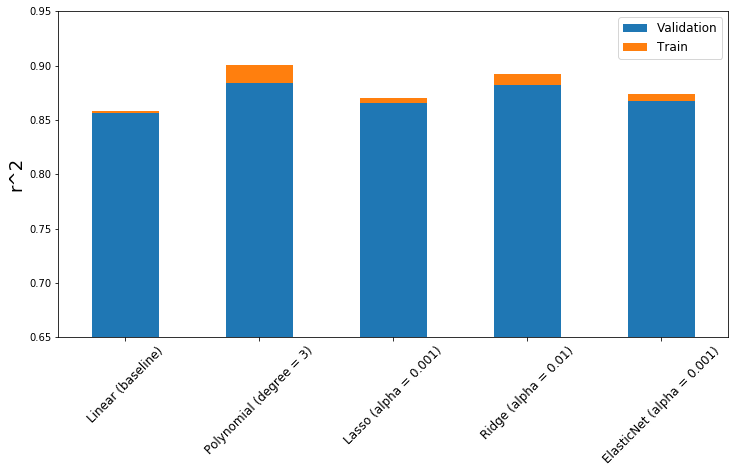

In [210]:
x = df_models[['Train r^2','Difference']]
y = df_models[['Model']]

df_models[['Train r^2','Difference']].plot(kind='bar',
                                           stacked=True,
                                           figsize=(12,6))
plt.xticks([0,1,2,3,4], df_models['Model'], fontsize=12)
plt.ylim(bottom=0.65, top=0.95)
plt.legend(labels=['Validation', 'Train'], fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('r^2', fontsize=18)
plt.show()

As expected, all of the models performed better on the training data than on the validation data. The differences between the model perfomances is very small (note that the y axis is only from 0.65 to 0.95). For this reason it is recommended to go with the more simple linear baseline model, as the increased complexity of the other models due to having additional features is not worth it.

## 4.4. Testing Model and Obtaining Coefficients

In [60]:
test_r_squared = baseline.score(X_test, y_test)
print(f'Test r^2: {test_r_squared}')

Test r^2: 0.8580710073904885


In [61]:
baseline_coefficients = baseline.coef_
df_coefficient = pd.DataFrame(baseline_coefficients)
df_coefficient.columns = ['Coefficients']
df_coefficient.insert(0, "Feature", list(df_top_corr_features))

In [62]:
df_coefficient.sort_values(by='Coefficients', ascending=False, inplace=True)
df_coefficient.reset_index(drop=True, inplace=True)
df_coefficient

,Feature,Coefficients
0,Diabetes prevalence raw value,2.456771
1,Insufficient sleep raw value,1.495413
2,Poor physical health days raw value,0.729910
3,Premature age-adjusted mortality raw value,-0.000233
4,Adult smoking raw value,-0.672123


## 4.5. Evaluation

In this section we assess the validity of the model and decide if improvements to the methodology need to be made.

### 4.5.1. Linear Relationships

The first assumption for linear regression is that there is a linear relationship between the target variable, poor mental health days, and the independent varibales. This has already been partially tested for in one of the earlier plots, however it will be repeated again here, this time including all of the independent variables.

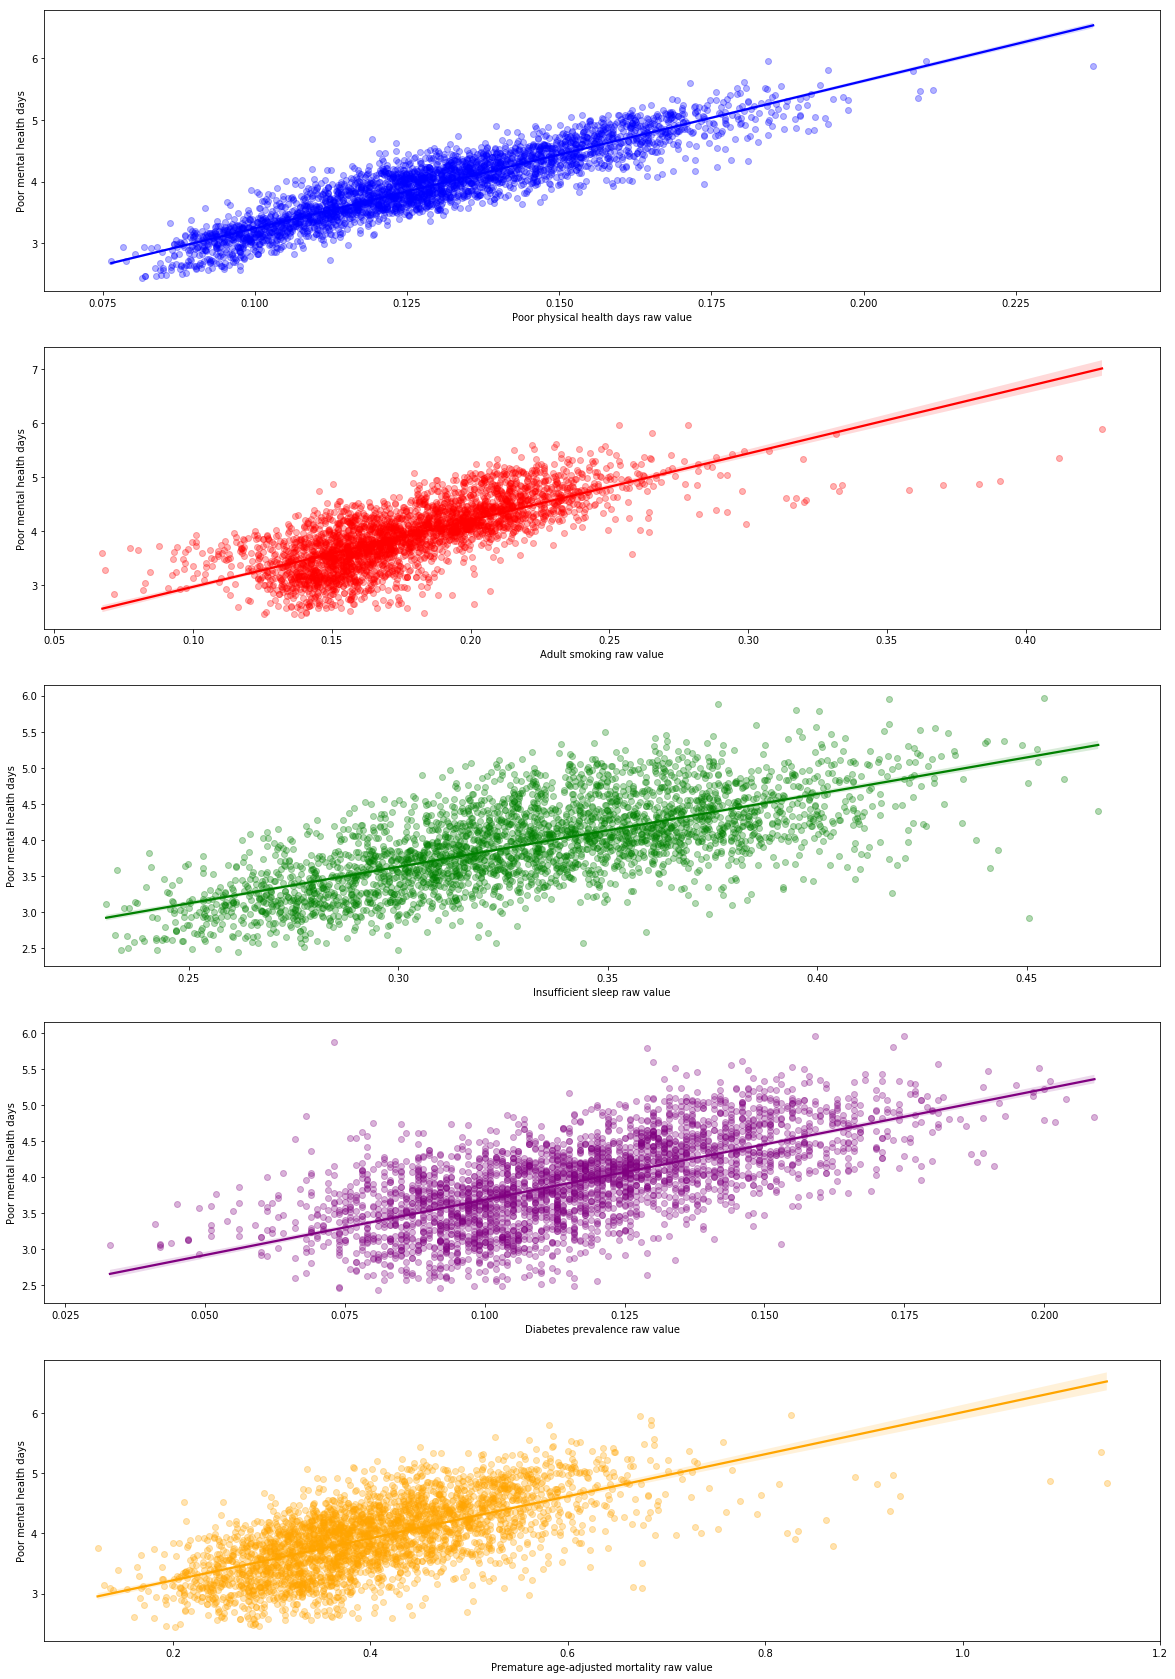

In [63]:
fig, ax = plt.subplots(5, 1, figsize=(20,30))

sns.regplot(df_modelling_1['Poor physical health days raw value']/(365/12), 
            y='Poor mental health days',
            data=df_modelling_1,
            color='blue',
            scatter_kws={'alpha':0.3},
            label='Poor physical health days',
            ax=ax[0])
sns.regplot(x='Adult smoking raw value', 
            y='Poor mental health days',
            data=df_modelling_1,
            color='red',
            scatter_kws={'alpha':0.3},
            label='Adult smoking',
            ax=ax[1])
sns.regplot(x='Insufficient sleep raw value', 
            y='Poor mental health days',
            data=df_modelling_1,
            color='green',
            scatter_kws={'alpha':0.3},
            label='Insufficient sleep',
            ax=ax[2])
sns.regplot(df_modelling_1['Diabetes prevalence raw value'], 
            y='Poor mental health days',
            data=df_modelling_1,
            color='purple',
            scatter_kws={'alpha':0.3},
            label='Insufficient sleep',
            ax=ax[3])
sns.regplot(df_modelling_1['Premature age-adjusted mortality raw value']/1000, 
            y='Poor mental health days',
            data=df_modelling_1,
            color='orange',
            scatter_kws={'alpha':0.3},
            label='Insufficient sleep',
            ax=ax[4])
plt.show()

From the plots above it looks as if the relationships are mostly linear. Adult smoking and premature age adjusted mortality may have a slight non-linear relationship to poor mental health, however since the performance of the model was not greatly increased when considering the non-linear relationships with the polynomial regression model, it is fair to say that we have linear relationships between our dependent and independent variables. Therefore the first assumption is satisfied.

### 4.5.2. Distribution of Residuals

The second assumption of linear regression is that the distribution of residuals is normal. To test this we used the yellowbrick python library to plot the residuals for the training and test data.

In [64]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 508 to 860
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Poor physical health days raw value         2095 non-null   float64
 1   Adult smoking raw value                     2095 non-null   float64
 2   Insufficient sleep raw value                2095 non-null   float64
 3   Diabetes prevalence raw value               2095 non-null   float64
 4   Premature age-adjusted mortality raw value  2095 non-null   float64
dtypes: float64(5)
memory usage: 98.2 KB


In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1947 to 440
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Poor physical health days raw value         1000 non-null   float64
 1   Adult smoking raw value                     1000 non-null   float64
 2   Insufficient sleep raw value                1000 non-null   float64
 3   Diabetes prevalence raw value               1000 non-null   float64
 4   Premature age-adjusted mortality raw value  1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB


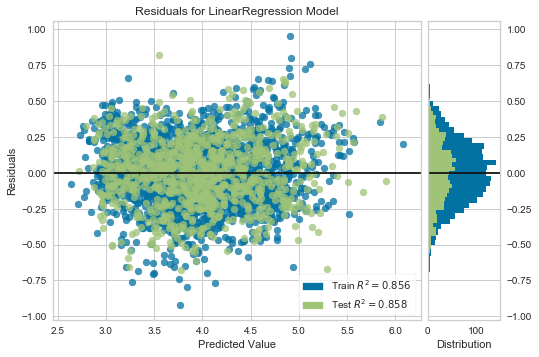

In [67]:
visualizer = ResidualsPlot(baseline)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()
plt.show()

### 4.5.3. Multicolinearity

The second assumption of linear regression is that there is no multicolinearity in the data. The presence of multicolinearity doesn't affect the model's performance, however it does inflate/deflate the coefficients, making it less interpretable and harder to formulate an action plan from the results.

To test for multicolinearity, a Variance Inflation Factor test is completed on the data. 

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
X = df_modelling_1.drop(columns=['Poor mental health days'])

In [70]:
vif_1 = pd.DataFrame()
vif_1["VIF Factor"] = [round(variance_inflation_factor(X.values, i)) for i in range(X.shape[1])]
vif_1["Feature"] = X.columns

In [71]:
vif_1.sort_values(by='VIF Factor', inplace=True)
vif_1

,VIF Factor,Feature
4,35.0,Premature age-adjusted mortality raw value
3,46.0,Diabetes prevalence raw value
2,71.0,Insufficient sleep raw value
1,84.0,Adult smoking raw value
0,113.0,Poor physical health days raw value


The multicolinearity is very high for this model. Anything over a VIF of 5 is usually too high and should be removed from the analysis. As stated above, this doesn't affect the model's performance, but it does mean that the coefficients it outputs are less realistic.

As the purpose of this study is to determine what actions need to be taken in order to improve the mental health of the population, it is important that we can make sense of the coefficients the model outputs, so that these can be directly translated into effective policy making. For this reason, the entire modelling section will be run again, this time trying to constrict the amount of multicolinearity present.

# 5. Modelling - Second Iteration (2/2)

## 5.1. Determining Multicolinearity

In [72]:
df_eval = df_cleaning.copy()

In [73]:
corr_mat_3 = df_eval.corr()

In [74]:
top_corr_2 = corr_mat_3['Poor mental health days'].abs(
                        ).sort_values(ascending=False)[1:21]
top_corr_2

Frequent mental distress raw value                0.952771
Poor physical health days raw value               0.918735
Frequent physical distress raw value              0.877342
Poor or fair health raw value                     0.741214
Adult smoking raw value                           0.739944
Insufficient sleep raw value                      0.684812
Diabetes prevalence raw value                     0.655727
Premature age-adjusted mortality raw value        0.648104
Children in poverty raw value                     0.643349
Life expectancy raw value                         0.633391
Excessive drinking raw value                      0.621617
Food insecurity raw value                         0.609024
Premature death raw value                         0.592205
Median household income raw value                 0.567724
Some college raw value                            0.545177
Physical inactivity raw value                     0.524205
Teen births raw value                             0.4982

In [75]:
df_top_corr_2 = pd.DataFrame(top_corr_2)
df_top_corr_2_features = df_top_corr_2.index
features_2 = list(df_top_corr_2_features)

In [76]:
X = df_eval[features_2]

In [77]:
len(X.columns)

20

In [78]:
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [round(variance_inflation_factor(X.values, i)) for i in range(X.shape[1])]
vif_2["Feature"] = X.columns

In [79]:
vif_2.sort_values(by='VIF Factor', inplace=True)
vif_2.head(5)

,VIF Factor,Feature
19,15.0,Unemployment raw value
16,19.0,Teen births raw value
17,28.0,Children in single-parent households raw value
18,38.0,Low birthweight raw value
11,40.0,Food insecurity raw value


In [80]:
features_3 = list(vif_2.head().iloc[:,1])

## 5.2. Train-Test Split

In [81]:
y = df_eval[["Poor mental health days"]]
X = df_eval[features_3]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1000)

In [83]:
kf = KFold(n_splits=5)

## 5.3. Model Creation

### 5.3.1. Linear Regression (Baseline Model)

In [84]:
# Creating empty lists
base_train_r_squared_list = []
base_test_r_squared_list = []
base_num_features = []

# Initiating the sklearn linear regression class
baseline = LinearRegression()

# The model is run through a KFold cross validation
model_scores = cross_validate(baseline,
                              X_train,
                              y_train,
                              scoring=('r2', 'neg_mean_squared_error'),
                              cv=kf,
                              return_train_score=True)

# The mean r^2 for the train and test data is appended to the lists
base_train_r_squared_list.append(model_scores['train_r2'].mean())
base_test_r_squared_list.append(model_scores['test_r2'].mean())

# The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
# outside of the cross_validate as the function does not store the  coefficients.
baseline.fit(X_train, y_train)
base_num_features.append(len(baseline.coef_))

# The lists are then used to create a dataframe containing all of the results for the model
df_base = pd.DataFrame()
df_base['Train r^2'] = base_train_r_squared_list
df_base['Validation r^2'] = base_test_r_squared_list
df_base['Difference'] = df_base['Train r^2'] - df_base['Validation r^2']
df_base['Number of Features'] = base_num_features
df_base

,Train r^2,Validation r^2,Difference,Number of Features
0,0.438062,0.430248,0.007814,1


### 5.3.2. Polynomial Regression

In [85]:
# Creating empty lists
degree_list = []
poly_train_r_squared_list = []
poly_test_r_squared_list = []
poly_num_features = []

# Creating a for loop to run through the increasing degrees of polynomial 
for degree in np.arange(1,6):
    
    # Transforming the training data to the polynomial degree
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    
    # Initiating the sklearn linear regression class
    poly_reg = LinearRegression()
    
    # The model is run through a KFold cross validation
    model_score = cross_validate(poly_reg,
                                 X_train_poly,
                                 y_train,
                                 scoring=('r2', 'neg_mean_squared_error'),
                                 cv=kf,
                                 return_train_score=True)
    
    # The polynomial degree,and the mean r^2 for the train and test data are appended to the lists
    degree_list.append(degree)
    poly_train_r_squared_list.append(model_score['train_r2'].mean())
    poly_test_r_squared_list.append(model_score['test_r2'].mean())
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    poly_reg.fit(X_train_poly, y_train)
    poly_num_features.append(len(poly_reg.coef_[0]))

# The lists are then used to create a dataframe containing all of the results for the model
df_poly = pd.DataFrame()
df_poly['Polynomial Degree'] = degree_list
df_poly['Train r^2'] = poly_train_r_squared_list
df_poly['Validation r^2'] = poly_test_r_squared_list
df_poly['Difference'] = df_poly['Train r^2'] - df_poly['Validation r^2']
df_poly['Number of Features'] = poly_num_features
df_poly

,Polynomial Degree,Train r^2,Validation r^2,Difference,Number of Features
0,1,0.438062,0.430248,0.007814,6
1,2,0.511791,0.482881,0.028910,21
2,3,0.558184,0.505449,0.052735,56
3,4,0.600453,-12.965769,13.566222,126
4,5,0.579663,-6.312869,6.892531,252


### 5.3.3. Lasso Regression

In [86]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)

In [87]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_poly)

In [88]:
# Creating empty lists
alpha_list = []
lasso_train_r_squared_list = []
lasso_test_r_squared_list = []
lasso_num_features = []

# Creating a for loop to run through increasing alpha (penalty parameter)
for alpha in np.linspace(0.0001, 0.01, 100):
    
    # Initiating the sklearn linear lasso class
    lasso = Lasso(alpha=alpha)

    # The model is run through a KFold cross validation
    model_scores = cross_validate(lasso,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2','neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    # The alpha,and the mean r^2 for the train and test data are appended to the lists
    alpha_list.append(alpha)
    lasso_train_r_squared_list.append(model_scores['train_r2'].mean())
    lasso_test_r_squared_list.append(model_scores['test_r2'].mean())
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    lasso.fit(X_train_s, y_train)
    lasso_coefficients = lasso.coef_
    lasso_coefficients  = lasso_coefficients[lasso_coefficients!=0]
    lasso_num_features.append(len(lasso_coefficients))

# The lists are then used to create a dataframe containing all of the results for the model
df_lasso = pd.DataFrame()
df_lasso['Alpha'] = alpha_list
df_lasso['Train r^2'] = lasso_train_r_squared_list
df_lasso['Validation r^2'] = lasso_test_r_squared_list
df_lasso['Difference'] = df_lasso['Train r^2'] - df_lasso['Validation r^2']
df_lasso['Number of Features'] = lasso_num_features
df_lasso.head(50)

,Alpha,Train r^2,Validation r^2,Difference,Number of Features
0,0.0001,0.511740,0.484248,0.027492,20
1,0.0002,0.511611,0.485950,0.025661,20
2,0.0003,0.511396,0.486768,0.024628,19
3,0.0004,0.511115,0.486808,0.024307,18
4,0.0005,0.510761,0.486898,0.023863,18
5,0.0006,0.510344,0.486917,0.023427,18
6,0.0007,0.509850,0.486852,0.022998,18
7,0.0008,0.509299,0.486666,0.022633,18
8,0.0009,0.508677,0.486402,0.022276,17
9,0.0010,0.508058,0.486270,0.021787,17


### 5.3.4. Ridge Regression

In [89]:
# Creating empty lists
alpha_list = []
ridge_train_r_squared_list = []
ridge_test_r_squared_list = []
ridge_num_features = []

# Creating a for loop to run through increasing alpha (penalty parameter)
for alpha in [0.001,0.01,1,50,100,1000,10000]:
    
    # Initiating the sklearn linear lasso class
    ridge = Ridge(alpha=alpha)
    
    # The model is run through a KFold cross validation
    model_scores = cross_validate(ridge,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2','neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    # The alpha,and the mean r^2 for the train and test data are appended to the lists
    alpha_list.append(alpha)
    ridge_train_r_squared_list.append(model_scores['train_r2'].mean())
    ridge_test_r_squared_list.append(model_scores['test_r2'].mean())
    
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    ridge.fit(X_train_s, y_train)
    ridge_coefficients = ridge.coef_
    ridge_coefficients  = ridge_coefficients[ridge_coefficients!=0]
    ridge_num_features.append(len(ridge_coefficients))

# The lists are then used to create a dataframe containing all of the results for the model
df_ridge = pd.DataFrame()
df_ridge['Alpha'] = alpha_list
df_ridge['Train r^2'] = ridge_train_r_squared_list
df_ridge['Validation r^2'] = ridge_test_r_squared_list
df_ridge['Difference'] = df_ridge['Train r^2'] - df_ridge['Validation r^2']
df_ridge['Number of Features'] = ridge_num_features
df_ridge

,Alpha,Train r^2,Validation r^2,Difference,Number of Features
0,0.001,0.511791,0.482885,0.028906,20
1,0.010,0.511791,0.482917,0.028874,20
2,1.000,0.511627,0.485766,0.025861,20
3,50.000,0.495865,0.485085,0.010780,20
4,100.000,0.482312,0.472962,0.009350,20
5,1000.000,0.409965,0.402608,0.007356,20
6,10000.000,0.345012,0.340744,0.004269,20


### 5.3.5. ElasticNet Regression

In [90]:
# Creating empty lists
alpha_list = []
elastic_train_r_squared_list = []
elastic_test_r_squared_list = []
elastic_num_features = []

# Creating a for loop to run through increasing alpha (penalty parameter)
for alpha in np.linspace(0.001, 0.1, 100):
    
    # Initiating the sklearn linear lasso class
    elastic = ElasticNet(alpha=alpha)
    
    # The model is run through a KFold cross validation
    model_scores = cross_validate(elastic,
                                  X_train_s,
                                  y_train,
                                  scoring=('r2', 'neg_mean_squared_error'),
                                  cv=kf,
                                  return_train_score=True)
    
    # The alpha,and the mean r^2 for the train and test data are appended to the lists
    alpha_list.append(alpha)
    elastic_train_r_squared_list.append(model_scores['train_r2'].mean())
    elastic_test_r_squared_list.append(model_scores['test_r2'].mean())
    
    # The number of coefficients in the model is appended to a list. To do this the model must be fit to the data 
    # outside of the cross_validate as the function does not store the coefficients.
    elastic.fit(X_train_s, y_train)
    elastic_coefficients = elastic.coef_
    elastic_coefficients  = elastic_coefficients[elastic_coefficients!=0]
    elastic_num_features.append(len(elastic_coefficients))

# The lists are then used to create a dataframe containing all of the results for the model
df_elastic = pd.DataFrame()
df_elastic['Alpha'] = alpha_list
df_elastic['Train r^2'] = elastic_train_r_squared_list
df_elastic['Validation r^2'] = elastic_test_r_squared_list
df_elastic['Difference'] = df_elastic['Train r^2'] - df_elastic['Validation r^2']
df_elastic['Number of Features'] = elastic_num_features
df_elastic.head(30)

,Alpha,Train r^2,Validation r^2,Difference,Number of Features
0,0.001,0.510306,0.487788,0.022518,18
1,0.002,0.507196,0.487795,0.019401,17
2,0.003,0.505131,0.488615,0.016517,13
3,0.004,0.503673,0.489373,0.014299,13
4,0.005,0.502137,0.489161,0.012976,13
5,0.006,0.500342,0.488492,0.011849,12
6,0.007,0.498302,0.487390,0.010912,12
7,0.008,0.496086,0.485975,0.010111,11
8,0.009,0.493709,0.484296,0.009413,10
9,0.010,0.491225,0.482328,0.008897,9


### 5.3.6. Comparison

In [91]:
models = ['Linear (baseline)',
          'Polynomial (degree = 2)',
          'Lasso (alpha = 0.0043)',
          'Ridge (alpha = 1)',
          'ElasticNet (alpha = 0.01)']

In [92]:
df_models = df_base
df_models.loc[df_poly.index[1]] = df_poly.iloc[1]
df_models.loc[df_lasso.index[2]] = df_lasso.iloc[42]
df_models.loc[df_ridge.index[3]] = df_ridge.iloc[0]
df_models.loc[df_elastic.index[4]] = df_elastic.iloc[9]
df_models.insert(0, "Model", models)
df_models

,Model,Train r^2,Validation r^2,Difference,Number of Features
0,Linear (baseline),0.438062,0.430248,0.007814,1.0
1,Polynomial (degree = 2),0.511791,0.482881,0.028910,21.0
2,Lasso (alpha = 0.0043),0.497351,0.487178,0.010173,9.0
3,Ridge (alpha = 1),0.511791,0.482885,0.028906,20.0
4,ElasticNet (alpha = 0.01),0.491225,0.482328,0.008897,9.0


<Figure size 864x864 with 0 Axes>

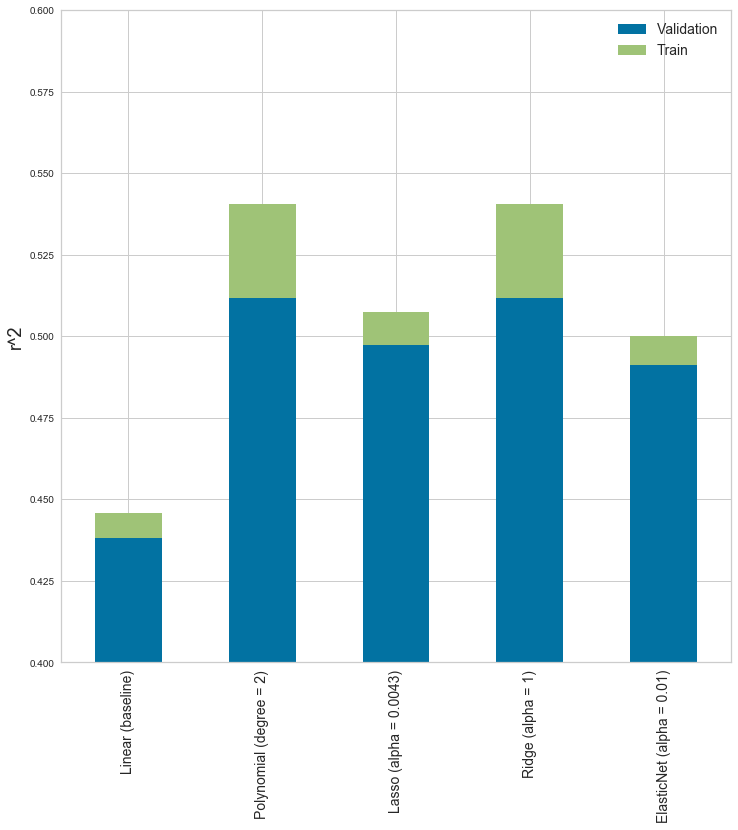

In [93]:
x = df_models[['Train r^2','Difference']]
y = df_models[['Model']]

plt.figure(figsize=(12,12))
df_models[['Train r^2','Difference']].plot(kind='bar',
                                           stacked=True,
                                           figsize=(12,12))
plt.xticks([0,1,2,3,4], df_models['Model'], fontsize=14)
plt.ylim(bottom=0.4, top=0.6)
plt.legend(labels=['Validation', 'Train'], fontsize=14)
plt.xlabel('')
plt.ylabel('r^2', fontsize=18)
plt.show()

## 5.4. Testing Model and Obtaining Coefficients

### 5.4.1. Testing

In [94]:
poly = PolynomialFeatures(2)
X_test_poly = poly.fit_transform(X_test)

In [95]:
scaler = StandardScaler()
X_test_s = scaler.fit_transform(X_test_poly)

In [96]:
lasso = Lasso(0.0043)
lasso.fit(X_test_s, y_test)

test_r_squared = lasso.score(X_test_s, y_test)
print(f'Test r^2: {test_r_squared}')

Test r^2: 0.5124456666192911


### 5.4.2. Obtaining Features and Coefficients

In [97]:
df_coefficient = pd.DataFrame()

features = poly.get_feature_names(X_test.columns)

df_coefficient['Feature'] = features
df_coefficient['Standardised Coefficient'] = lasso.coef_

### 5.4.3. Inversing Scaler Transformation

In [98]:
poly = PolynomialFeatures(2)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train))

In [99]:
X_train_poly.head()
features = poly.get_feature_names(X_test.columns)

In [100]:
X_train_poly.columns = features
coeff_std = list(X_train_poly.std())

In [101]:
df_coefficient["Standard Deviation"] = coeff_std

In [102]:
df_coefficient = df_coefficient[df_coefficient['Standardised Coefficient'] != 0]
df_coefficient["Coefficient"] = df_coefficient["Standardised Coefficient"] * df_coefficient["Standard Deviation"]
df_coefficient.sort_values(by='Coefficient', ascending=False, inplace=True)
df_coefficient.reset_index(drop=True, inplace=True)
df_coefficient

,Feature,Standardised Coefficient,Standard Deviation,Coefficient
0,Teen births raw value,0.114234,15.005950,1.714190
1,Food insecurity raw value,0.423095,0.041950,0.017749
2,Children in single-parent households raw value,0.073518,0.102550,0.007539
3,Low birthweight raw value,0.312998,0.020177,0.006315
4,Unemployment raw value,0.164218,0.017446,0.002865
5,Unemployment raw value^2,-0.039819,0.002491,-0.000099
6,Low birthweight raw value Food insecurity raw ...,-0.073553,0.006379,-0.000469
7,Low birthweight raw value^2,-0.208882,0.003873,-0.000809
8,Food insecurity raw value^2,-0.183242,0.013532,-0.002480
9,Children in single-parent households raw value^2,-0.064713,0.075245,-0.004869


## 5.5. Evaluation

In [103]:
X_train_s = pd.DataFrame(X_train_s)
X_train_s.shape

(2095, 21)

In [108]:
y_train = pd.Series(y_train["Poor mental health days"])

In [112]:
y_test = pd.Series(y_test["Poor mental health days"])

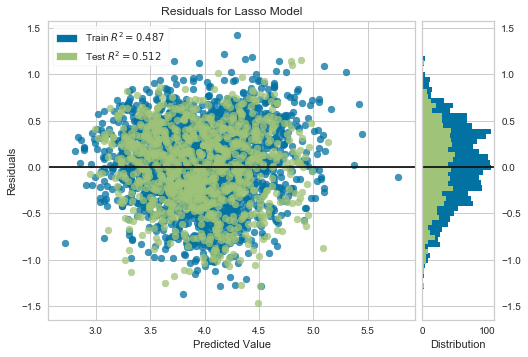

In [114]:
visualizer = ResidualsPlot(lasso)

visualizer.fit(X_train_s,
               y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_s,
                 y_test)  # Evaluate the model on the test data
visualizer.show()
plt.show()